# AIエンジニアを目指す人のための機械学習入門

## 第２章：実装しながら学ぶアルゴリズムのこころ・教師あり学習編

### <u>Boston House-prices(ボストン住宅価格)を用いた**住宅価格予測AI**の構築</u>

### データセットの用意

In [1]:
from sklearn.model_selection import train_test_split
from mglearn.datasets import load_extended_boston # データセットのダウンロードに使用

In [2]:
X, y = load_extended_boston()

/Users/kkurihara/ai/study/ai-engineer/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
X.shape

(506, 104)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [5]:
import pandas as pd

In [6]:
# array([0.39164591, 0.45334355])
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.002079,0.22,0.197947,0.0,0.094650,0.391646,0.693100,0.620657,0.260870,0.272901,...,0.074475,0.188708,0.267554,0.125983,0.478158,0.677941,0.319222,0.961199,0.452600,0.213116
1,0.001090,0.25,0.171188,0.0,0.139918,0.453344,0.456231,0.527640,0.304348,0.185115,...,0.034267,0.139821,0.185115,0.038259,0.570507,0.755319,0.156108,1.000000,0.206678,0.042716
2,0.001106,0.40,0.218109,1.0,0.127572,0.710098,0.474768,0.332603,0.130435,0.127863,...,0.016349,0.068012,0.125396,0.015242,0.282933,0.521654,0.063407,0.961792,0.116906,0.014210
3,0.097903,0.00,0.646628,0.0,0.633745,0.557578,0.987642,0.054206,1.000000,0.914122,...,0.835619,0.739077,0.902781,0.388199,0.653689,0.798480,0.343349,0.975342,0.419400,0.180344
4,0.121703,0.00,0.646628,0.0,0.604938,0.617168,0.905252,0.062736,1.000000,0.914122,...,0.835619,0.739077,0.048982,0.606892,0.653689,0.043323,0.536776,0.002871,0.035574,0.440773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.003120,0.00,0.253666,0.0,0.222222,0.411381,0.735324,0.326592,0.173913,0.190840,...,0.036420,0.142115,0.188063,0.052713,0.554550,0.733846,0.205691,0.971113,0.272195,0.076294
375,0.000903,0.45,0.109238,0.0,0.106996,0.693045,0.240989,0.486519,0.173913,0.402672,...,0.162145,0.111377,0.396163,0.012667,0.076505,0.272125,0.008701,0.967935,0.030949,0.000990
376,0.001626,0.00,0.350073,0.0,0.333333,0.471355,0.820803,0.147114,0.217391,0.467557,...,0.218610,0.258649,0.464740,0.110567,0.306021,0.549858,0.130818,0.987983,0.235054,0.055922
377,0.002506,0.00,0.236437,0.0,0.129630,0.473079,0.850669,0.414644,0.086957,0.087786,...,0.007706,0.049497,0.086865,0.041350,0.317904,0.557915,0.265579,0.979131,0.466086,0.221866


In [7]:
X_train[2, 4]

0.12757201646090532

In [8]:
df_y = pd.DataFrame(y_train)
df_y

,0
0,18.5
1,19.6
2,33.2
3,13.1
4,7.5
...,...
374,18.5
375,36.4
376,19.2
377,16.6


In [9]:
y_train[378]

23.1

### 単回帰モデルの実装

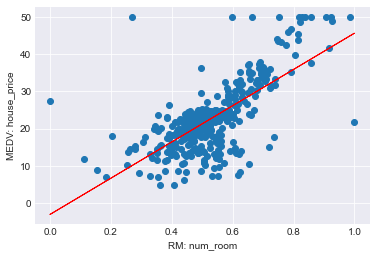

In [10]:
import matplotlib.pyplot as plt
from sklearn import linear_model


plt.style.use("seaborn-darkgrid") # グラフのスタイルを変換

# 部屋の数のカラム（5列目(0始まり)）のみ抽出
X_train_single = X_train[:, 5].reshape(-1, 1)
X_test_single = X_test[:, 5].reshape(-1, 1)

# 単回帰モデルの適用
lm_single = linear_model.LinearRegression()
lm_single.fit(X_train_single, y_train)

# 構築した単回帰モデルで訓練データを予測
y_pred_train = lm_single.predict(X_train_single)

# 訓練データと学習した単回帰モデルの可視化
plt.xlabel("RM: num_room")
plt.ylabel("MEDV: house_price")
plt.scatter(X_train_single, y_train) #各データ点（散布図）を作図
plt.plot(X_train_single, y_pred_train, color="red", linewidth=1) # 回帰した直線を作図
plt.show()

In [11]:
# 学習したパラメータ（intercept: バイアス（切片）とcoef: 重み（傾き））の確認

print("intercept: {:.2f}".format(lm_single.intercept_))
print("coef: {:.2f}".format(lm_single.coef_[0]))

intercept: -3.02
coef: 48.60


In [12]:
# モデルの評価
print("Train score: {:.2f}".format(lm_single.score(X_train_single, y_train)))
print("Test score: {:.2f}".format(lm_single.score(X_test_single, y_test)))

Train score: 0.49
Test score: 0.47


↑スコアがtrain, test両者で低いのであまり良くないモデル

### 重回帰モデル（特徴量が複数）の実装

In [13]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

# パラメータ（intercept: バイアス、coef: 重み先頭4個）
print("intercept: {:.2f}".format(lm.intercept_))
print("coef: {}".format(lm.coef_[:4]))

print("====")

# モデル評価
print("Train: {:.2f}".format(lm.score(X_train, y_train)))
print("Test: {:.2f}".format(lm.score(X_test, y_test)))

intercept: 30.93
coef: [-412.7109467   -52.24320682 -131.89881469  -12.00413648]
====
Train: 0.95
Test: 0.61


trainはうまく学習できるようになっている。testも一応向上してるが低い。過学習していると思われ。汎化性能はイマイチか。

### L2正則化(Ridge回帰)による過学習の抑制

In [14]:
ridge = linear_model.Ridge(alpha=1.0, random_state=0)
ridge.fit(X_train, y_train)

print("intercept: {:.2f}".format(ridge.intercept_))
print("coef: {}".format(ridge.coef_[:4]))

print("====")

print("Train: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test: {:.2f}".format(ridge.score(X_test, y_test)))

intercept: 21.39
coef: [-1.41368408 -1.55661895 -1.46543409 -0.12661607]
====
Train: 0.89
Test: 0.75


trainは少し下がったが、Testがかなり上がっているので汎化性能が上がり、過学習が抑制されている。
重みの絶対値も小さくなっている。

### L1正則化(Lasso)の実装

In [15]:
import numpy as np

lasso = linear_model.Lasso(alpha=0.01, max_iter=2000, random_state=0)
lasso.fit(X_train, y_train)

# 値が0以外の重みパラメータの表示
print(type(lasso.coef_))
print("Number of nonzero parameters: {}".format(np.count_nonzero(lasso.coef_)))

print("====")

# モデル評価
print("Train: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test: {:.2f}".format(lasso.score(X_test, y_test)))

<class 'numpy.ndarray'>
Number of nonzero parameters: 33
====
Train: 0.90
Test: 0.77


- L2正則化もL1正則化も、化学週の抑制に貢献している
- L1の場合は一部の特徴量は、重みパラメータが0になることによって考慮されなくなっている
    - つまりL1正則化は重要な特徴量だけを残す正則化と解釈することが可能

### <u>ロジスティック回帰によるクラス分類</u>

#### 架空の会員顧客データ作成

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
plt.style.use("seaborn-darkgrid")

In [18]:
np.random.seed(0)

In [19]:
# 2次元ガウス分布で模擬データ100人分を作成①
mean = [10, 10] # 平均値
cov = [[10, 3], [3, 10]] # 分散共分散行列
x1, y1 = np.random.multivariate_normal(mean, cov, 100).T # 2次元データ作成
true_false = np.random.rand(100) > 0.9
label1 = np.where(true_false, 1, 0)

# 2次元ガウス分布で模擬データ100人分を作成②
mean = [20, 20]
cov = [[8, 4], [4, 8]]
x2, y2 = np.random.multivariate_normal(mean, cov, 100).T
true_false = np.random.rand(100) > 0.1
label2 = np.where(true_false, 1, 0)

# 配列の結合
X = (np.r_[x1, x2])
Y = (np.r_[y1, y2])
label = (np.r_[label1, label2])

In [20]:
X.shape

(200,)

In [21]:
Y.shape

(200,)

In [22]:
label.shape

(200,)

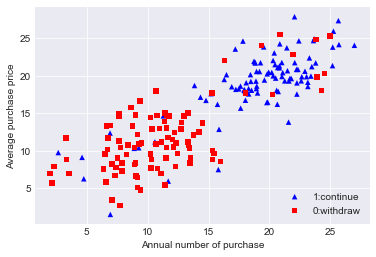

In [23]:
plt.scatter(X[label==1], Y[label==1], marker="^", s=30, c="blue", edgecolors="none", label="1:continue")
plt.scatter(X[label==0], Y[label==0], marker=",", s=30, c="red", edgecolors="none", label="0:withdraw")

plt.xlabel("Annual number of purchase")
plt.ylabel("Average purchase price")

plt.legend(loc="lower right") # 凡例の表示位置を制御
plt.show()

#### モデル作成

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [25]:
Data = np.c_[X, Y]
Data.shape
X_train, X_test, y_train, y_test = train_test_split(Data, label, random_state=0)

In [26]:
clf = linear_model.LogisticRegression(random_state=0) #ロジスティック回帰モデルの読み込み
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

<AxesSubplot:>

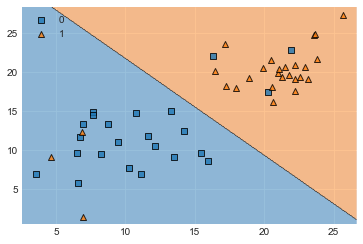

In [27]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)

In [28]:
print("acc-train: {:.2f}".format(clf.score(X_train, y_train)))
print("acc-test: {:.2f}".format(clf.score(X_test, y_test)))

acc-train: 0.88
acc-test: 0.88


In [29]:
label_prenew = clf.predict([[20, 15], [10, 20]])
print("新たな顧客2人のラベルはそれぞれ{}, {}です。".format(label_prenew[0], label_prenew[1]))
print(label_prenew)
print(type(label_prenew))

新たな顧客2人のラベルはそれぞれ1, 0です。
[1 0]
<class 'numpy.ndarray'>


### <u>SVC（サポートベクターマシーンクラシフィケーション）によるクラス分類</u>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

plt.style.use("seaborn-darkgrid")

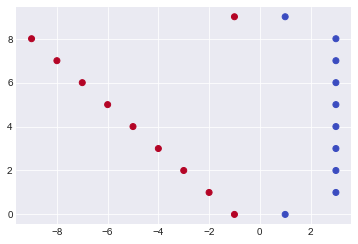

In [31]:
# データの準備①
X = np.zeros((20,2))
X[0:10, 1] = range(0, 10)
X[10:20, 1] = range(0, 10)
X[0, 0] = 1.0
X[9, 0] = 1.0
X[1:9, 0] = 3.0
X[10:20, 0] = range(-1, -11, -1)
X[9, 0] = 1
X[19, 0] = -1

y = np.zeros((20))
y[10:20] = 1.0
y = y.astype(np.int8)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

- ロジスティック回帰

(20, 2)


<AxesSubplot:>

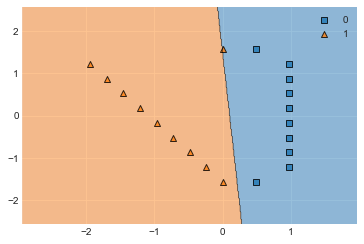

In [32]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression


# 入力を正規化
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
print(X_std.shape)

# ロジスティック回帰
lr = LogisticRegression(random_state=0)
lr.fit(X_std, y)
plot_decision_regions(X_std, y, clf=lr)

- ハードマージンSVC

<AxesSubplot:>

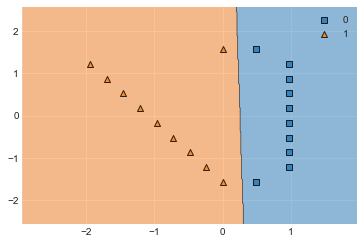

In [33]:
from sklearn import svm


# LinearSVCの適用
clf = svm.LinearSVC(random_state=0)
clf.fit(X_std, y)
plot_decision_regions(X_std, y, clf)

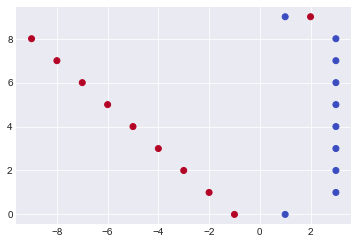

In [34]:
# データの準備②
X[19, 0] = 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

- 線形分離できないデータに対してのLinearSVC

<AxesSubplot:>

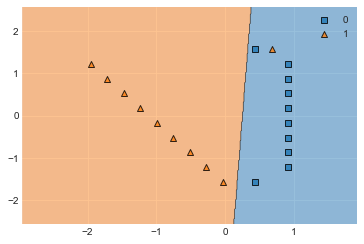

In [35]:
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

clf = svm.LinearSVC(random_state=0)
clf.fit(X_std, y)
plot_decision_regions(X_std, y, clf=clf)

- ソフトマージンSVCについて
    - 外れ値がある場合、サポートベクトルと外れ値の距離の大きさをペナルティと呼ぶ。マージンの最大化とペナルティの最小化をどれくらい両立させたいかをControl(C)を定義して決める。Cが大きいほど、ペナルティ最小化重視、つまり外れ値に引っ張られた境界線となる。Cが小さいほど、マージン最大化重視、つまり外れ値は無視した境界線となる。デフォルトはC=1.0

<AxesSubplot:>

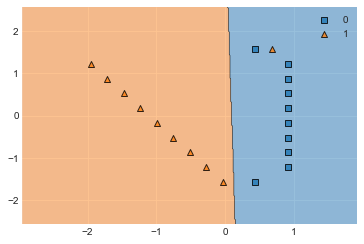

In [36]:
# ソフトマージンSVC(C=0.2)の適用
clf = svm.LinearSVC(C=0.2, random_state=0)
clf.fit(X_std, y)
plot_decision_regions(X_std, y, clf=clf)

- 線形の境界線を作る（今回）: Linear SVC
- 非線形の境界線を造るSVC: Kernel SVC

### <u>決定木によるクラス分類</u>

In [37]:
from sklearn.datasets import load_wine # データセット(Wineデータセット)のダウンロード
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# データセットの準備
wine = load_wine()
print(wine.data.shape)
print(wine.target.shape)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=41)

(178, 13)
(178,)


In [38]:
# 決定木
tree = DecisionTreeClassifier(max_depth=None, criterion="gini", random_state=41)
tree.fit(X_train, y_train)

# 精度 (Accuracy)
print("Train: {:.3f}".format(tree.score(X_train, y_train)))
print("Test: {:.3f}".format(tree.score(X_test, y_test)))

Train: 1.000
Test: 0.911


In [39]:
import graphviz
from sklearn.tree import export_graphviz

In [40]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [41]:
# Graphviz形式で決定木をエクスポート

dot_data = export_graphviz(tree, out_file=None, impurity=False, filled=True, feature_names=wine.feature_names, class_names=wine.target_names
)

# Graphviz形式の決定木を表示
graph = graphviz.Source(dot_data)

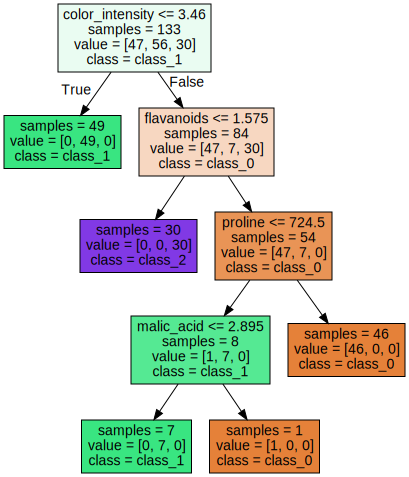

In [42]:
graph

木の深さを制限しないと過学習を起こす

In [43]:
# 決定木
tree = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=41)
tree.fit(X_train, y_train)

# 精度 (Accuracy)
print("Train: {:.3f}".format(tree.score(X_train, y_train)))
print("Test: {:.3f}".format(tree.score(X_test, y_test)))

Train: 0.992
Test: 0.933


決定木を使うとどの特徴量がどれくらい重要かを定量的に測ることが可能

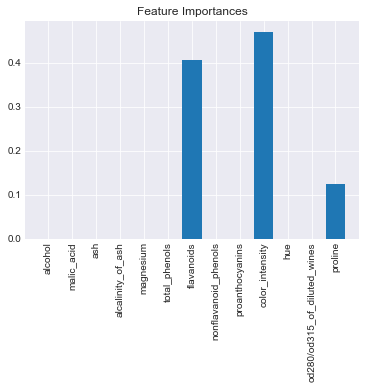

In [78]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

# 特徴量の重要度を可視化
n_features = wine.data.shape[1]
plt.title("Feature Importances")
plt.bar(range(n_features), tree.feature_importances_, align="center")
plt.xticks(range(n_features), wine.feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### <u>ランダムフォレストによるクラス分類</u>

In [70]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=7, max_features=3, max_depth=3, criterion="gini", random_state=41)
forest.fit(X_train, y_train)

print("Train: {:.3f}".format(forest.score(X_train, y_train)))
print("Test: {:.3f}".format(forest.score(X_test, y_test)))

Train: 0.992
Test: 0.978


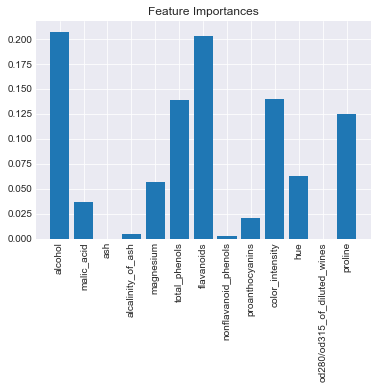

In [79]:
plt.style.use("seaborn-darkgrid")

n_features = wine.data.shape[1]
plt.title("Feature Importances")
plt.bar(range(n_features), forest.feature_importances_, align="center")
plt.xticks(range(n_features), wine.feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### ランダムフォレストの意義
- 決定木は過学習しやすい
- ランダムフォレストでは２つのランダム性を導入して過学習を抑制している。
    - データのランダム性
    - 特徴量のランダム性

### <u>Naive Bayesによるテキストデータの分類</u>

In [91]:
# データ準備
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

train_set = fetch_20newsgroups(subset="train", random_state=42)
test_set = fetch_20newsgroups(subset="test", random_state=42)

In [90]:
print(len(train_set.data))
print(len(train_set.target))

11314
11314


In [92]:
X_train = train_set.data
y_train = train_set.target
X_test = test_set.data
y_test = test_set.target

In [93]:
print("カテゴリ一覧")
print("記事その１")
print("News Script: \n{}".format(X_train[0]))
print("記事その１のカテゴリ")
print("Text Category label: {}".format(y_train[0]))

カテゴリ一覧
記事その１
News Script: 
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





記事その１のカテゴリ
Text Category label: 7


In [102]:
from sklearn.feature_extraction.text import CountVectorizer


# テキストをベクトル化
vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)


# １番目の文書のBoW表現のベクトルを表示
print(type(X_train_bow))
print("(テキスト番号, 単語番号), 出現回数")
print(X_train_bow[0])
print("Bow表現ベクトル")
print(X_train_bow[0].toarray())
print(len(X_train_bow[0].toarray()[0]))

<class 'scipy.sparse.csr.csr_matrix'>
(テキスト番号, 単語番号), 出現回数
  (0, 4605)	1
  (0, 16574)	1
  (0, 18299)	1
  (0, 26070)	1
  (0, 34131)	1
  (0, 34943)	1
  (0, 35135)	1
  (0, 35560)	1
  (0, 37378)	1
  (0, 37722)	5
  (0, 40939)	1
  (0, 45232)	1
  (0, 48550)	1
  (0, 48552)	1
  (0, 50039)	1
  (0, 50455)	2
  (0, 51651)	1
  (0, 51714)	1
  (0, 57203)	1
  (0, 63238)	1
  (0, 63970)	1
  (0, 65968)	1
  (0, 67023)	1
  (0, 73061)	1
  (0, 74552)	1
  :	:
  (0, 79519)	1
  (0, 83103)	1
  (0, 86416)	1
  (0, 87451)	1
  (0, 90192)	1
  (0, 91885)	1
  (0, 94962)	1
  (0, 95944)	1
  (0, 98748)	1
  (0, 99619)	1
  (0, 101175)	1
  (0, 104609)	1
  (0, 105907)	1
  (0, 108033)	1
  (0, 109044)	1
  (0, 109354)	1
  (0, 111094)	1
  (0, 113755)	1
  (0, 114195)	1
  (0, 114439)	1
  (0, 118013)	2
  (0, 118714)	1
  (0, 122887)	2
  (0, 124627)	1
  (0, 127721)	1
Bow表現ベクトル
[[0 0 0 ... 0 0 0]]
129796


In [103]:
X_train_bow.shape

(11314, 129796)

In [105]:
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB(alpha=0.4)
mnb.fit(X_train_bow, y_train)

print("Train: {:.3f}".format(mnb.score(X_train_bow, y_train)))
print("Test: {:.3f}".format(mnb.score(X_test_bow, y_test)))

Train: 0.951
Test: 0.811
